<a href="https://colab.research.google.com/github/divyasri-22/Module-building/blob/main/moduleipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('/content/framingham.csv')

df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


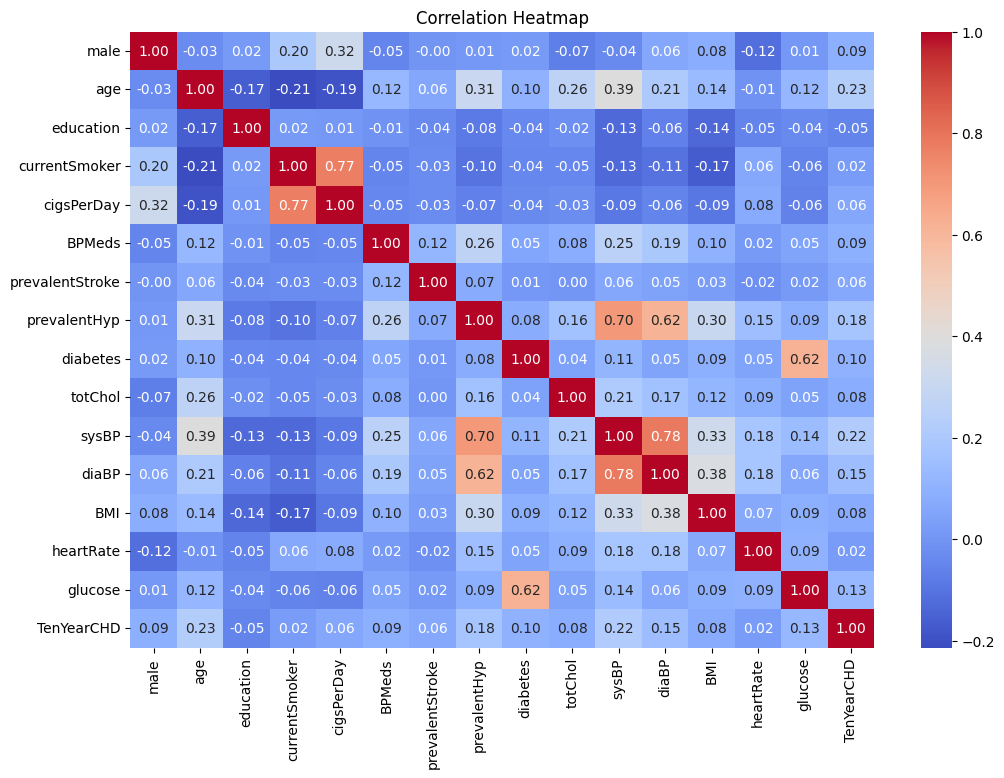

In [5]:
# Correlation heatmap for numeric features
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

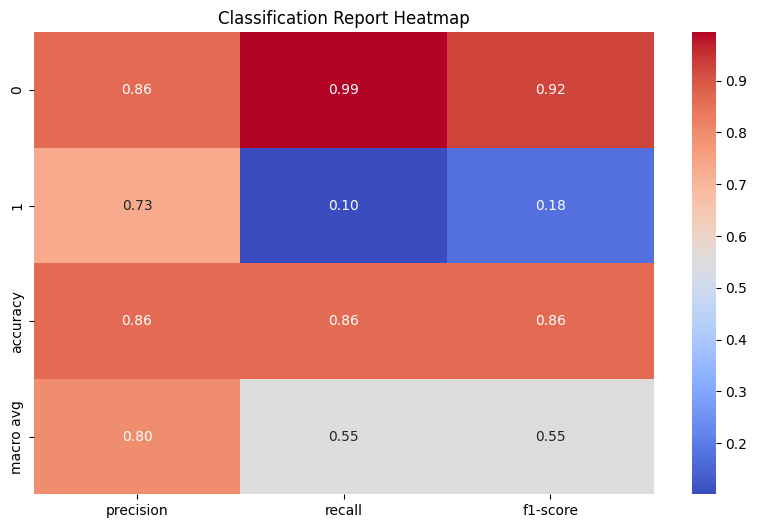

Accuracy:  0.8616352201257862
Confusion Matrix: 
 [[1077    7]
 [ 169   19]]
Predicted class for the new data point: 1
Prediction probabilities: [[2.99760217e-14 1.00000000e+00]]


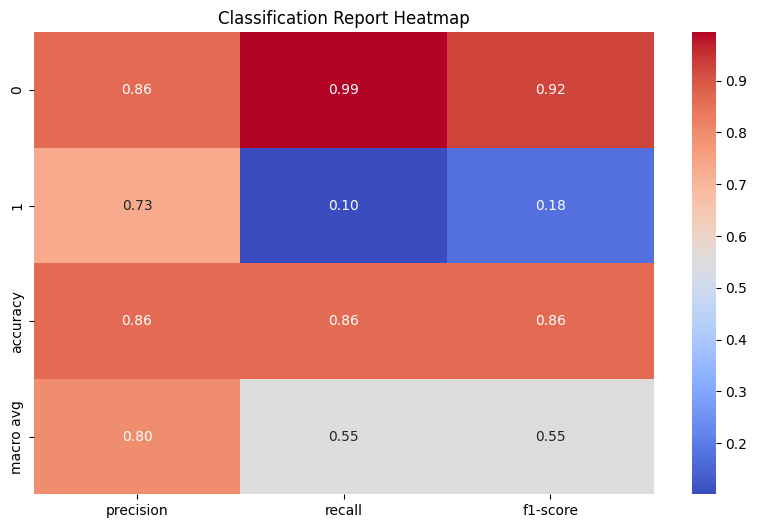

In [11]:
#Evaluation Metrics for Regression: MSE, MAE, R2, Adj
#Evaluation Metrics Classification: Accuracy, F1-Score, Precision, Recall
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np # Make sure numpy is imported for mean imputation

# Impute missing values with the mean before splitting
# This calculates the mean for each column, ignoring NaNs, and fills the NaNs with that mean.
df_imputed = df.fillna(df.mean())

# Define features and target variable from the imputed DataFrame
X = df_imputed.drop('TenYearCHD', axis=1)
y = df_imputed['TenYearCHD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions, output_dict=True)  # Convert report to dict for heatmap

# Convert the classification report into a DataFrame for easy plotting
report_df = pd.DataFrame(class_report).transpose()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='coolwarm', fmt='.2f')  # Exclude support row and accuracy column
plt.title('Classification Report Heatmap')
plt.show()

# Print out accuracy and confusion matrix for reference
print("Accuracy: ", accuracy)
print("Confusion Matrix: \n",conf_matrix)

# New data point for prediction (must have 15 features as in the training set)
# Note: The imputation method used on the training data should also be applied to new data points
# For simplicity here, we'll assume the new data point is already imputed or handle it separately.
new_data_point = [0.5, 65, 1, 130, 85, 120, 0, 1, 250, 0, 1, 0, 0, 60, 0]  # Example 15 values, replace with actual values

# Reshape new data point to 2D array since a single sample needs to be in that format
import numpy as np
new_data_point = np.array(new_data_point).reshape(1, -1)

# Predict the class for the new data point
new_prediction = model.predict(new_data_point)
new_prediction_proba = model.predict_proba(new_data_point)

print(f"Predicted class for the new data point: {new_prediction[0]}")
print(f"Prediction probabilities: {new_prediction_proba}")

# Plot the heatmap of the classification report (same as before)
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()

Predicted class for the new data point: 1
Prediction probabilities: [[2.99760217e-14 1.00000000e+00]]


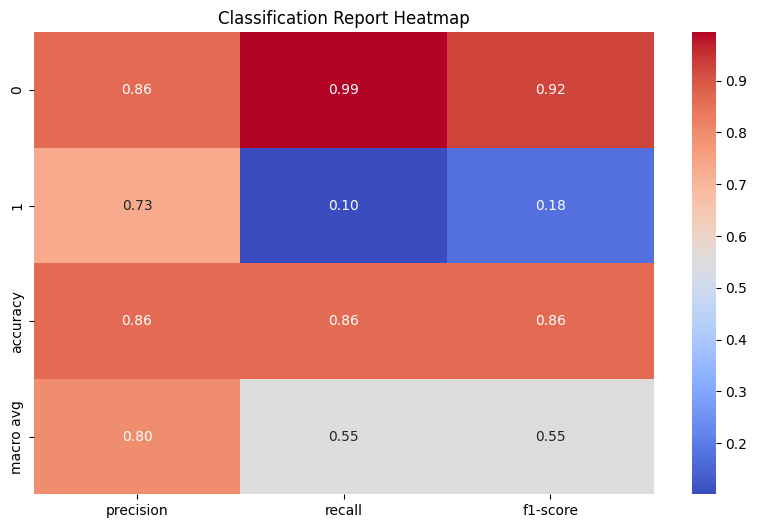

In [12]:
# New data point for prediction (must have 15 features as in the training set)
new_data_point = [0.5, 65, 1, 130, 85, 120, 0, 1, 250, 0, 1, 0, 0, 60, 0]  # Example 15 values, replace with actual values

# Reshape new data point to 2D array since a single sample needs to be in that format
import numpy as np
new_data_point = np.array(new_data_point).reshape(1, -1)

# Predict the class for the new data point
new_prediction = model.predict(new_data_point)
new_prediction_proba = model.predict_proba(new_data_point)

print(f"Predicted class for the new data point: {new_prediction[0]}")
print(f"Prediction probabilities: {new_prediction_proba}")

# Plot the heatmap of the classification report (same as before)
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()